## 데이터 불러오기

In [ ]:
import pandas as pd 

fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


- Weight : 무게
- Length : 길이
- Diagonal : 대각선 
- Height : 높이 
- Width : 너비 (두께)

## 데이터 확인

In [ ]:
fish['Species'].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

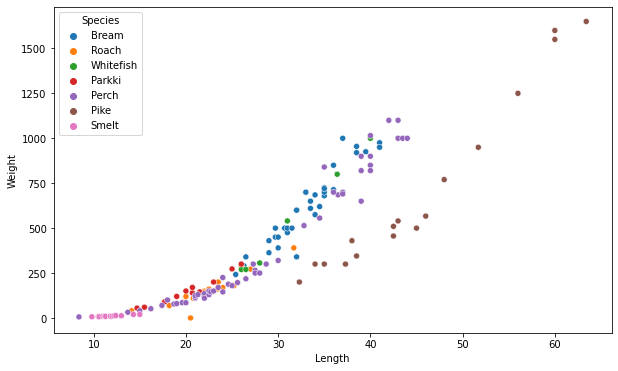

In [ ]:
import seaborn as sns 
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(data = fish, x = "Length", y = "Weight", hue = 'Species')
plt.show()

## 머신러닝을 위한 데이터 준비
- 행렬로 변환
  + pandas 데이터프레임

### Input 변수 변환 
- 독립변수

In [ ]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


### Target 변수 변환
- 반응변수, 종속변수

In [ ]:
fish_target = fish['Species'].to_numpy()
fish_target

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Whitefish',
       'Whitefish', 'Whitefish', 'Whitefish', 'Whitefish', 'Whitefish',
       'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki',
       'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perc

## 데이터 세트 분리
- 훈련데이터와 테스트 데이터로 분리

In [ ]:
from sklearn.model_selection import train_test_split 

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42
)

train_input.shape, test_input.shape, train_target.shape, test_target.shape

((119, 5), (40, 5), (119,), (40,))

## scaled 표준화
  + 서로 다른 단위를 표준화 시키는 것

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

## 머신러닝 모형 개발
- KNN 머신러닝

In [ ]:
from sklearn.neighbors import KNeighborsClassifier 

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)

print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


- Bream이 첫번째 클래스, Parkki 두번째 클래스가... 

In [ ]:
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [ ]:
print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


- 확률값으로 다시 추출

In [ ]:
import numpy as np

proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4)) 

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']

[0.     0.     0.6667 0.     0.3333 0.     0.    ]

In [ ]:
import pandas as pd
result = pd.DataFrame({
    'classes' : ['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'], 
    'proba' : [0.,     0.,     0.6667, 0.,     0.3333, 0.,     0.    ]
})

result.T

,0,1,2,3,4,5,6
classes,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
proba,0.0,0.0,0.6667,0.0,0.3333,0.0,0.0


In [ ]:
distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])

[['Roach' 'Perch' 'Perch']]


## 새로운 알고리즘의 필요성
- 선형회귀 
  + 로지스틱 회귀
    - 딥러닝의 시작
- 유투브 강의 
  + 선형회귀에서 선형성 가정위반 --> 로지스틱 회귀, 식 유도
- 현재 주어진 데이터 
  - Weight : 무게
  - Length : 길이
  - Diagonal : 대각선 
  - Height : 높이 
  - Width : 너비 (두께)
- 확률값 구하기 공식
  + z = a * (Weight) + b * (Length) + .. + f
    - z가 매우 큰 음수 --> 0
    - z가 아주 큰 양수 --> 1
  + 시그모이드 함수를 사용한다. 

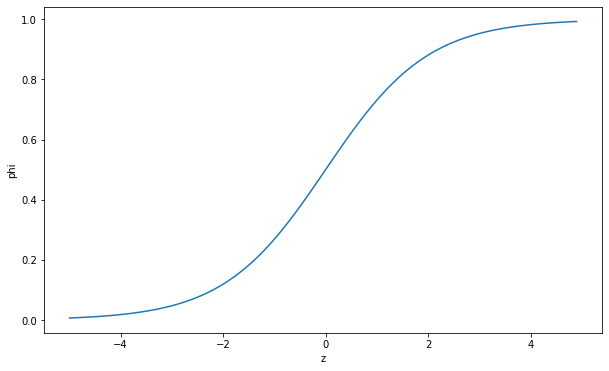

In [ ]:
z = np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z)) # 시그모이드 함수

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(z, phi)
ax.set_xlabel('z')
ax.set_ylabel('phi')

plt.show()

### 로지스틱 회귀로 이진 분류 수행하기
- 주어진 데이터 
  + train_scaled & test_scaled
  + Bream, Smelt 


### Boolean Indexing
- True, False 값을 활용함. 

In [ ]:
name_arr = np.array(['가', '나', '다', '라', '마'])
              # >180  <180 ....
boolean_arr = [True, False, True, False, False]

In [ ]:
name_arr[boolean_arr]

array(['가', '다'], dtype='<U1')

- Bream & Smelt 가져올 것

In [ ]:
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
bream_smelt_indexes

array([ True, False,  True, False, False, False, False,  True, False,
       False, False,  True, False, False, False,  True,  True, False,
       False,  True, False,  True, False, False, False,  True, False,
       False,  True, False, False, False, False,  True, False, False,
        True,  True, False, False, False, False, False,  True, False,
       False, False, False, False,  True, False,  True, False, False,
        True, False, False, False,  True, False, False, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False, False, False, False, False,  True, False,  True, False,
       False,  True,  True, False, False, False,  True, False, False,
       False, False, False,  True, False, False, False,  True, False,
        True, False, False,  True,  True, False, False, False, False,
       False, False, False, False,  True,  True, False, False,  True,
       False, False])

- 새로운 데이터 생성

In [ ]:
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

train_bream_smelt.shape, target_bream_smelt.shape

((33, 5), (33,))

- 모형 만들기

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [ ]:
print(lr.predict(train_bream_smelt[:5]))
print(lr.predict_proba(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']
[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


In [ ]:
print(lr.classes_)

['Bream' 'Smelt']


In [ ]:
print(lr.coef_, lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


- z = a * (무게) + ... + lr.intercept_
- 처음 5개 샘플의 z값을 출력하자. 

In [ ]:
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


- 시그모이드 함수를 활용하여 각 데이터의 phi를 구하자. 

In [ ]:
from scipy.special import expit
print(expit(decisions))

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


In [ ]:
print(lr.predict_proba(train_bream_smelt[:5]))

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


### 로지스틱 회귀로 다중 분류 수행하기

In [ ]:
lr = LogisticRegression(C=20, max_iter = 1000) # ridge, Lasso,  Alpha와 반대개념
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [ ]:
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [ ]:
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
